In [611]:

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from trustee import ClassificationTrustee

from sklearn import metrics
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


using only time_since_last_DNS gave me .61 accuracy and .56 on test, with 10 max depth

lower with the other 2 features, lower with 20 estimators

using only time_since_last_DNS gave me .59 accuracy and .59 on test, with 5 max depth

using only time_since_last_DNS gave me .58 accuracy and .59 on test, with 4 max depth, estimators = 5/20 too

added avg and median gave me .56 and .58 test, with estimators = 10 and depth = 2

big decrease from 3 -> 4 max depth

increased window of scroll to 2000 for avg and med significant  increase
dropped when set to 1500 and 10000 and 3000

In [605]:
dataset_path = '../datasets/combined_batches.csv'
test_dataset_path = '../datasets/test_batches.csv'
features_to_drop = ['rolling_std_time_since_last_DNS', 'rolling_var_time_since_last_DNS', 'ratio_time_since_last_DNS_avg', 'rolling_avg_time_since_last_DNS', 'time_since_last_DNS', 'curr_state']

In [614]:
df = pd.read_csv(dataset_path)
targets = df['curr_state']
features = df


median_dns = features['time_since_last_DNS'].median()
features['ratio_time_since_last_DNS'] = features['time_since_last_DNS'] / median_dns

avg_dns = features['rolling_avg_time_since_last_DNS'].median()
features['ratio_time_since_last_DNS_avg'] = features['time_since_last_DNS'] / avg_dns

features['time_since_last_DNS' ] = scaler.fit_transform(features['time_since_last_DNS'].values.reshape(-1, 1))
features['ratio_time_since_last_DNS' ] = scaler.fit_transform(features['ratio_time_since_last_DNS'].values.reshape(-1, 1))
features['ratio_time_since_last_DNS_avg' ] = scaler.fit_transform(features['ratio_time_since_last_DNS_avg'].values.reshape(-1, 1))

features = features.drop(features_to_drop, axis=1)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.3, random_state=42)


clf = RandomForestClassifier(
    n_estimators=20,
    max_depth=5,  # Limit the depth of trees
    min_samples_split=6,  # Minimum number of samples required to split an internal node
    min_samples_leaf=8,  # Minimum number of samples required to be at a leaf node
    max_features='sqrt',  # Maximum number of features considered for splitting a node
    random_state=42,
    n_jobs=-1
)

clf.fit(X_train, y_train)

# Evaluate the classifier
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Playing', 'Paused', 'Buffering']))

# Retrieve and print feature importances
importances = clf.feature_importances_
feature_names = features.columns
feature_importances = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

for feature, importance in feature_importances:
    print(f"{feature}: {importance}")
    
# n=20 d=5
# window=2000
# CURRENT BEST: Accuracy: 0.7417352077280511
# CURRENT BEST TEST: Accuracy: 0.7359821378450455
# time_since_last_DNS
# rolling_median_time_since_last_DNS 
# 'rolling_avg_time_since_last_DNS

# n=20 d=5
# window=2000
# Accuracy: 0.7524381376391683
# Test Dataset Accuracy: 0.7541075761564899
# ratio_time_since_last_DNS: 0.5209691063435197
# rolling_median_time_since_last_DNS: 0.4790308936564804

Accuracy: 0.7524381376391683

Classification Report:
               precision    recall  f1-score   support

     Playing       0.73      0.69      0.71    417259
      Paused       0.70      0.72      0.71    417924
   Buffering       0.83      0.85      0.84    419053

    accuracy                           0.75   1254236
   macro avg       0.75      0.75      0.75   1254236
weighted avg       0.75      0.75      0.75   1254236

ratio_time_since_last_DNS: 0.5209691063435197
rolling_median_time_since_last_DNS: 0.4790308936564804


In [613]:

test_df = pd.read_csv('../datasets/test_batches.csv')

y_test = test_df['curr_state']
X_test = test_df
median_dns = X_test['time_since_last_DNS'].median()
X_test['ratio_time_since_last_DNS'] = X_test['time_since_last_DNS'] / median_dns

avg_dns = X_test['rolling_avg_time_since_last_DNS'].median()
X_test['ratio_time_since_last_DNS_avg'] = X_test['time_since_last_DNS'] / avg_dns


X_test['time_since_last_DNS' ] = scaler.fit_transform(X_test['time_since_last_DNS'].values.reshape(-1, 1))
X_test['ratio_time_since_last_DNS' ] = scaler.fit_transform(X_test['ratio_time_since_last_DNS'].values.reshape(-1, 1))
X_test['ratio_time_since_last_DNS_avg' ] = scaler.fit_transform(X_test['ratio_time_since_last_DNS_avg'].values.reshape(-1, 1))
X_test = X_test.drop(features_to_drop, axis=1)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=['Playing', 'Paused', 'Buffering'])

print("Test Dataset Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)

Test Dataset Accuracy: 0.7477808691829598

Classification Report:
               precision    recall  f1-score   support

     Playing       0.69      0.70      0.69    421599
      Paused       0.72      0.68      0.70    421599
   Buffering       0.83      0.86      0.85    421599

    accuracy                           0.75   1264797
   macro avg       0.75      0.75      0.75   1264797
weighted avg       0.75      0.75      0.75   1264797



In [530]:
df = pd.read_csv('../datasets/combined_batches.csv')
df = df[df['curr_state'] != 3]
df['curr_state'] = df['curr_state'].replace({1: 0, 2: 1})
targets = df['curr_state']
features = df.drop(['curr_state'], axis=1)
scaler = StandardScaler()


median_dns = features['time_since_last_DNS'].median()
features['ratio_time_since_last_DNS'] = features['time_since_last_DNS'] / median_dns

avg_dns = features['rolling_avg_time_since_last_DNS'].median()
features['ratio_time_since_last_DNS_avg'] = features['time_since_last_DNS'] / avg_dns

features['time_since_last_DNS' ] = scaler.fit_transform(features['time_since_last_DNS'].values.reshape(-1, 1))
features['ratio_time_since_last_DNS' ] = scaler.fit_transform(features['ratio_time_since_last_DNS'].values.reshape(-1, 1))


features = features.drop(['rolling_avg_time_since_last_DNS', 'ratio_time_since_last_DNS_avg', 'time_since_last_DNS'], axis=1)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.3, random_state=42)


clf = RandomForestClassifier(
    n_estimators=10,
    max_depth=2,  # Limit the depth of trees
    min_samples_split=6,  # Minimum number of samples required to split an internal node
    min_samples_leaf=8,  # Minimum number of samples required to be at a leaf node
    max_features='sqrt',  # Maximum number of features considered for splitting a node
    random_state=42,
    n_jobs=-1
)

clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Playing', 'Paused']))


importances = clf.feature_importances_
feature_names = features.columns
feature_importances = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

for feature, importance in feature_importances:
    print(f"{feature}: {importance}")
 


Accuracy: 0.6829973318407907

Classification Report:
               precision    recall  f1-score   support

     Playing       0.80      0.48      0.60    418202
      Paused       0.63      0.88      0.74    417955

    accuracy                           0.68    836157
   macro avg       0.72      0.68      0.67    836157
weighted avg       0.72      0.68      0.67    836157

rolling_median_time_since_last_DNS: 0.727811208607154
ratio_time_since_last_DNS: 0.272188791392846


In [531]:

test_df = pd.read_csv('../datasets/test_batches.csv')
test_df = test_df[test_df['curr_state'] != 3]
test_df['curr_state'] = test_df['curr_state'].replace({1: 0, 2: 1})

y_test = test_df['curr_state']
X_test = test_df.drop(['curr_state'], axis=1)

median_dns = X_test['time_since_last_DNS'].median()

X_test['ratio_time_since_last_DNS'] = X_test['time_since_last_DNS'] / median_dns
avg_dns = X_test['rolling_avg_time_since_last_DNS'].median()
X_test['ratio_time_since_last_DNS_avg'] = X_test['time_since_last_DNS'] / avg_dns

X_test['time_since_last_DNS' ] = scaler.fit_transform(X_test['time_since_last_DNS'].values.reshape(-1, 1))
X_test['ratio_time_since_last_DNS' ] = scaler.fit_transform(X_test['ratio_time_since_last_DNS'].values.reshape(-1, 1))
X_test = X_test.drop(['rolling_avg_time_since_last_DNS', 'ratio_time_since_last_DNS_avg', 'time_since_last_DNS'], axis=1)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=['Playing', 'Paused'])

print("Test Dataset Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)

Test Dataset Accuracy: 0.6625039433205486

Classification Report:
               precision    recall  f1-score   support

     Playing       0.78      0.45      0.57    421599
      Paused       0.61      0.87      0.72    421599

    accuracy                           0.66    843198
   macro avg       0.70      0.66      0.65    843198
weighted avg       0.70      0.66      0.65    843198



In [601]:
df = pd.read_csv('../datasets/combined_batches.csv')
df['curr_state'] = df['curr_state'].replace({1: 0, 2: 0, 3: 1})
targets = df['curr_state']
features = df.drop(['curr_state'], axis=1)
scaler = StandardScaler()


median_dns = features['time_since_last_DNS'].median()
features['ratio_time_since_last_DNS'] = features['time_since_last_DNS'] / median_dns

avg_dns = features['rolling_avg_time_since_last_DNS'].median()
features['ratio_time_since_last_DNS_avg'] = features['time_since_last_DNS'] / avg_dns

features['time_since_last_DNS' ] = scaler.fit_transform(features['time_since_last_DNS'].values.reshape(-1, 1))
features['ratio_time_since_last_DNS' ] = scaler.fit_transform(features['ratio_time_since_last_DNS'].values.reshape(-1, 1))


features = features.drop(['rolling_avg_time_since_last_DNS', 'rolling_var_time_since_last_DNS', 'rolling_std_time_since_last_DNS'], axis=1)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.3, random_state=42)


clf = RandomForestClassifier(
    n_estimators=10,
    max_depth=4,  # Limit the depth of trees
    min_samples_split=6,  # Minimum number of samples required to split an internal node
    min_samples_leaf=8,  # Minimum number of samples required to be at a leaf node
    max_features='sqrt',  # Maximum number of features considered for splitting a node
    random_state=42,
    n_jobs=-1
)

clf.fit(X_train, y_train)

# Evaluate the classifier
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Playing/Paused', 'Buffering']))

# Retrieve and print feature importances
importances = clf.feature_importances_
feature_names = features.columns
feature_importances = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

for feature, importance in feature_importances:
    print(f"{feature}: {importance}")
    
# estimators = 5
# depth = 4
# Accuracy: 0.8373184950838598
# Test Accuracy: 0.8270876670327333

# estimators = 15
# depth = 4
# Accuracy: 0.8344657624242966
# Test Accuracy: 0.8278601230078819
# rolling_median_time_since_last_DNS: 0.4421140953744597
# time_since_last_DNS: 0.43135960117843614
# time_since_last_HTTP: 0.1265263034471041

# estimators = 15
# depth = 4
# Accuracy: 0.8346890058968168
# Test Accuracy: 0.8283060443691754
# rolling_median_time_since_last_DNS: 0.47158862405103374
# time_since_last_DNS: 0.39836478796671343
# time_since_last_HTTP: 0.13004658798225283

# estimators = 13
# depth = 4
# Accuracy: 0.8827501363379778
# Test Accuracy: 0.885733441809239
# time_since_last_DNS: 0.5528468052750741
# rolling_median_time_since_last_DNS: 0.2685080034801221
# rolling_avg_time_since_last_DNS: 0.17864519124480369

# estimators = 12
# depth = 4
# Accuracy: 0.8813444997592159
# Test Accuracy: 0.893475395656378
# time_since_last_DNS: 0.5394731605566682
# rolling_median_time_since_last_DNS: 0.283350634211406
# rolling_avg_time_since_last_DNS: 0.1771762052319259

# estimators = 10
# depth = 4
# Accuracy: 0.8804036879821661
# Test Accuracy: 0.9031781384680704
# time_since_last_DNS: 0.5426074621960476
# rolling_median_time_since_last_DNS: 0.2682206143064375
# rolling_avg_time_since_last_DNS: 0.18917192349751494

# estimators = 10
# depth = 4
# Accuracy: 0.889433886445613
# Test Dataset Accuracy: 0.8833061748248928
# ratio_time_since_last_DNS: 0.38519550388423635
# time_since_last_DNS: 0.30909722105144627
# rolling_median_time_since_last_DNS: 0.3057072750643175

# estimators = 10
# depth = 4
# Accuracy: 0.9096422044973992
# Test Dataset Accuracy: 0.8947989282074514
# ratio_time_since_last_DNS: 0.3272980120499538
# time_since_last_DNS: 0.3209724829177506
# rolling_median_time_since_last_DNS: 0.19174602496226456
# rolling_avg_time_since_last_DNS: 0.15998348007003105

# estimators = 10
# depth = 4
# Accuracy: 0.8942384048934969
# Test Dataset Accuracy: 0.8996020705298953
# time_since_last_DNS: 0.3209173754213653
# ratio_time_since_last_DNS: 0.23622465198063747
# rolling_median_time_since_last_DNS: 0.19432815528501288
# ratio_time_since_last_DNS_avg: 0.13402366572702618
# rolling_avg_time_since_last_DNS: 0.11450615158595825

# estimators = 10
# depth = 4
# Accuracy: 0.8912014963691044
# Test Dataset Accuracy: 0.8998874918267517
# rolling_median_time_since_last_DNS: 0.3350874294888655
# time_since_last_DNS: 0.25728902783627194
# ratio_time_since_last_DNS_avg: 0.2459751592885186
# ratio_time_since_last_DNS: 0.16164838338634405


Accuracy: 0.8912014963691044

Classification Report:
                 precision    recall  f1-score   support

Playing/Paused       0.89      0.95      0.92    835183
     Buffering       0.88      0.78      0.83    419053

      accuracy                           0.89   1254236
     macro avg       0.89      0.86      0.87   1254236
  weighted avg       0.89      0.89      0.89   1254236

rolling_median_time_since_last_DNS: 0.3350874294888655
time_since_last_DNS: 0.25728902783627194
ratio_time_since_last_DNS_avg: 0.2459751592885186
ratio_time_since_last_DNS: 0.16164838338634405


In [602]:

test_df = pd.read_csv('../datasets/test_batches.csv')
test_df['curr_state'] = test_df['curr_state'].replace({1: 0, 2: 0, 3: 1})
y_test = test_df['curr_state']
X_test = test_df.drop(['curr_state'], axis=1)

median_dns = X_test['time_since_last_DNS'].median()

X_test['ratio_time_since_last_DNS'] = X_test['time_since_last_DNS'] / median_dns
avg_dns = X_test['rolling_avg_time_since_last_DNS'].median()
X_test['ratio_time_since_last_DNS_avg'] = X_test['time_since_last_DNS'] / avg_dns

X_test['time_since_last_DNS' ] = scaler.fit_transform(X_test['time_since_last_DNS'].values.reshape(-1, 1))
X_test['ratio_time_since_last_DNS' ] = scaler.fit_transform(X_test['ratio_time_since_last_DNS'].values.reshape(-1, 1))
X_test = X_test.drop(['rolling_avg_time_since_last_DNS', 'rolling_var_time_since_last_DNS', 'rolling_std_time_since_last_DNS'], axis=1)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=['Playing/Paused', 'Buffering'])

print("Test Dataset Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)

Test Dataset Accuracy: 0.8998874918267517

Classification Report:
                 precision    recall  f1-score   support

Playing/Paused       0.91      0.95      0.93    843198
     Buffering       0.88      0.81      0.84    421599

      accuracy                           0.90   1264797
     macro avg       0.89      0.88      0.88   1264797
  weighted avg       0.90      0.90      0.90   1264797



Training score of pruned DT: 0.9999840924824497
Model explanation global fidelity report:


/Users/luisbravo/Projects/detecting_pauses/venv/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           1       0.99      0.92      0.95    917407
           2       0.94      0.98      0.96   1008140
           3       0.97      0.99      0.98   1001002

    accuracy                           0.96   2926549
   macro avg       0.97      0.96      0.96   2926549
weighted avg       0.97      0.96      0.96   2926549

Model explanation score report:
              precision    recall  f1-score   support

           1       0.75      0.65      0.70    976336
           2       0.68      0.74      0.71    975671
           3       0.81      0.85      0.83    974542

    accuracy                           0.75   2926549
   macro avg       0.75      0.75      0.74   2926549
weighted avg       0.75      0.75      0.74   2926549



[Text(0.5375, 0.9375, 'ratio_time_since_last_DNS <= 0.052\ngini = 0.666\nsamples = 1024291\nvalue = [320944, 351679, 351668]\nclass = Paused'),
 Text(0.275, 0.8125, 'rolling_median_time_since_last_DNS <= 1.585\ngini = 0.578\nsamples = 647988\nvalue = [250223, 332427, 65338]\nclass = Paused'),
 Text(0.225, 0.6875, 'rolling_median_time_since_last_DNS <= 1.037\ngini = 0.559\nsamples = 577739\nvalue = [180651, 332427, 64661]\nclass = Paused'),
 Text(0.175, 0.5625, 'gini = 0.006\nsamples = 41180\nvalue = [41046, 134, 0]\nclass = Buffering'),
 Text(0.275, 0.5625, 'rolling_median_time_since_last_DNS <= 1.201\ngini = 0.534\nsamples = 536559\nvalue = [139605, 332293, 64661]\nclass = Paused'),
 Text(0.1, 0.4375, 'ratio_time_since_last_DNS <= -0.203\ngini = 0.25\nsamples = 234573\nvalue = [3395, 200893, 30285]\nclass = Paused'),
 Text(0.05, 0.3125, 'gini = 0.026\nsamples = 203310\nvalue = [1570, 200607, 1133]\nclass = Paused'),
 Text(0.15, 0.3125, 'rolling_median_time_since_last_DNS <= 1.199\ngin

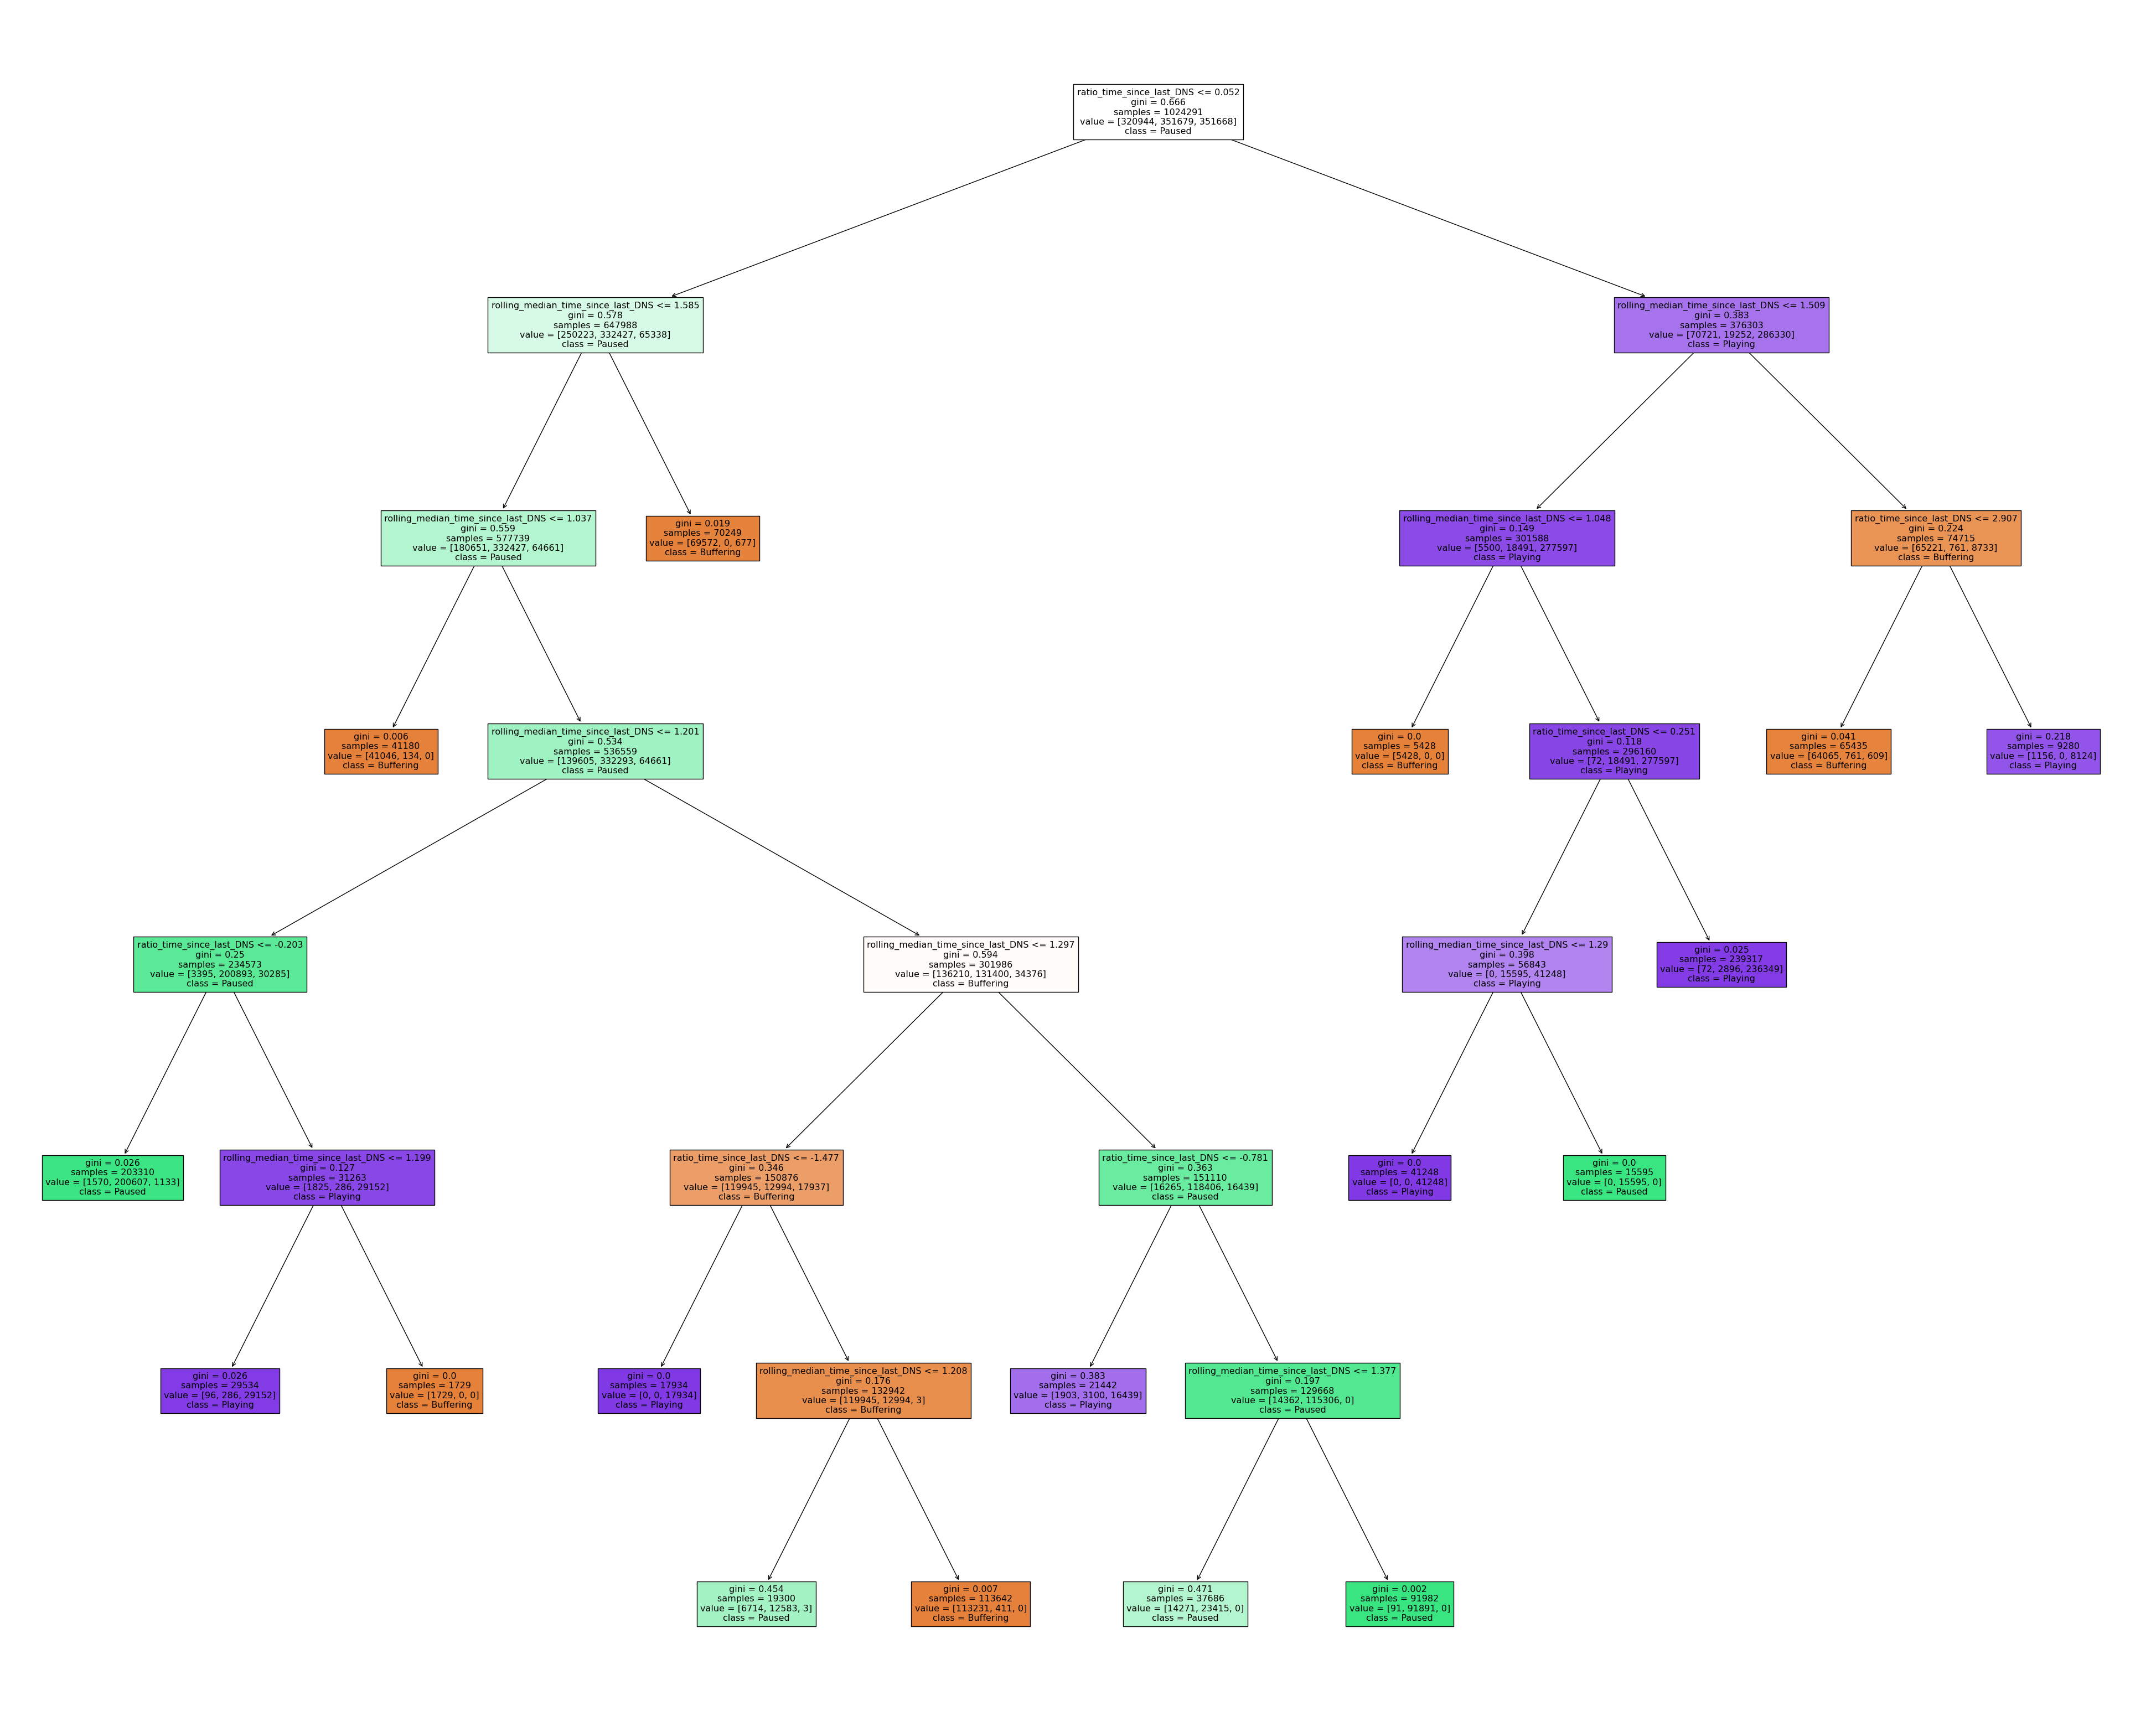

In [569]:
# Create and Train a Trustee Tree
trustee = ClassificationTrustee(expert=clf)
trustee.fit(X_train, y_train, num_samples=len(X_train) // 2, num_iter=10,train_size=0.70)
# Display Trustee Results
_, dt, _, score = trustee.explain()
print(f"Training score of pruned DT: {score}")
dt_y_pred = dt.predict(X_train)
print("Model explanation global fidelity report:")
print(metrics.classification_report(clf.predict(X_train), dt_y_pred))
print("Model explanation score report:")
print(metrics.classification_report(y_train, dt_y_pred))
# plot a tree
fig = plt.figure(figsize=(50,40))
plot_tree(dt, feature_names=X_train.columns, class_names=sorted(["Playing", "Paused", "Buffering"]), filled=True, max_depth=7)

In [618]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def build_dnn_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=input_shape),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')  # or 'softmax' for multi-class
    ])
    
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',  # or 'categorical_crossentropy' for multi-class
                  metrics=['accuracy'])
    
    return model

df = pd.read_csv('../datasets/combined_batches.csv')
df['curr_state'] = df['curr_state'].replace({1: 0, 2: 0, 3: 1})
targets = df['curr_state']
features = df.drop(['curr_state'], axis=1)
scaler = StandardScaler()


median_dns = features['time_since_last_DNS'].median()
features['ratio_time_since_last_DNS'] = features['time_since_last_DNS'] / median_dns

avg_dns = features['rolling_avg_time_since_last_DNS'].median()
features['ratio_time_since_last_DNS_avg'] = features['time_since_last_DNS'] / avg_dns

features['time_since_last_DNS' ] = scaler.fit_transform(features['time_since_last_DNS'].values.reshape(-1, 1))
features['ratio_time_since_last_DNS' ] = scaler.fit_transform(features['ratio_time_since_last_DNS'].values.reshape(-1, 1))


features = features.drop(['rolling_avg_time_since_last_DNS', 'rolling_var_time_since_last_DNS', 'rolling_std_time_since_last_DNS'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

dnn_model = build_dnn_model(input_shape=(X_train.shape[1],))


dnn_history = dnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


dnn_loss, dnn_accuracy = dnn_model.evaluate(X_test, y_test)
print(f"DNN Test Accuracy: {dnn_accuracy*100:.2f}%")



Epoch 1/10
73164/73164 [==============================] - 57s 774us/step - loss: 0.2434 - accuracy: 0.9040 - val_loss: 0.2210 - val_accuracy: 0.9104
Epoch 2/10
73164/73164 [==============================] - 56s 772us/step - loss: 0.2265 - accuracy: 0.9091 - val_loss: 0.2124 - val_accuracy: 0.9144
Epoch 3/10
73164/73164 [==============================] - 59s 811us/step - loss: 0.2199 - accuracy: 0.9115 - val_loss: 0.2075 - val_accuracy: 0.9172
Epoch 4/10
73164/73164 [==============================] - 65s 895us/step - loss: 0.2165 - accuracy: 0.9126 - val_loss: 0.2074 - val_accuracy: 0.9148
Epoch 5/10
73164/73164 [==============================] - 71s 971us/step - loss: 0.2143 - accuracy: 0.9133 - val_loss: 0.2052 - val_accuracy: 0.9163
Epoch 6/10
73164/73164 [==============================] - 68s 924us/step - loss: 0.2130 - accuracy: 0.9137 - val_loss: 0.2023 - val_accuracy: 0.9175
Epoch 7/10
73164/73164 [==============================] - 60s 824us/step - loss: 0.2117 - accuracy: 0.9142

In [621]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report


df = pd.read_csv('../datasets/test_batches.csv')
df['curr_state'] = df['curr_state'].replace({1: 0, 2: 0, 3: 1})
targets = df['curr_state']
features = df.drop(['curr_state'], axis=1)


median_dns = features['time_since_last_DNS'].median()
avg_dns = features['rolling_avg_time_since_last_DNS'].median()


features['ratio_time_since_last_DNS'] = features['time_since_last_DNS'] / median_dns
features['ratio_time_since_last_DNS_avg'] = features['time_since_last_DNS'] / avg_dns


features['time_since_last_DNS'] = scaler.transform(features['time_since_last_DNS'].values.reshape(-1, 1))
features['ratio_time_since_last_DNS'] = scaler.transform(features['ratio_time_since_last_DNS'].values.reshape(-1, 1))


features = features.drop(['rolling_avg_time_since_last_DNS', 'rolling_var_time_since_last_DNS', 'rolling_std_time_since_last_DNS'], axis=1)


y_pred_probs = dnn_model.predict(features)

y_pred = (y_pred_probs > 0.5).astype(int)


print(classification_report(targets, y_pred))


39525/39525 [==============================] - 12s 314us/step
              precision    recall  f1-score   support

           0       0.69      0.99      0.81    843198
           1       0.87      0.10      0.18    421599

    accuracy                           0.69   1264797
   macro avg       0.78      0.55      0.49   1264797
weighted avg       0.75      0.69      0.60   1264797



In [626]:
from tensorflow.keras.layers import LSTM

def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(50, return_sequences=False),
        Dropout(0.2),
        Dense(50, activation='relu'),
        Dense(1, activation='sigmoid') 
    ])
    
    model.compile(optimizer='adam',
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    
    return model

df = pd.read_csv('../datasets/combined_batches.csv')
df['curr_state'] = df['curr_state'].replace({1: 0, 2: 0, 3: 1})
targets = df['curr_state']
features = df.drop(['curr_state'], axis=1)
scaler = StandardScaler()


median_dns = features['time_since_last_DNS'].median()
features['ratio_time_since_last_DNS'] = features['time_since_last_DNS'] / median_dns

avg_dns = features['rolling_avg_time_since_last_DNS'].median()
features['ratio_time_since_last_DNS_avg'] = features['time_since_last_DNS'] / avg_dns

features['time_since_last_DNS' ] = scaler.fit_transform(features['time_since_last_DNS'].values.reshape(-1, 1))
features['ratio_time_since_last_DNS' ] = scaler.fit_transform(features['ratio_time_since_last_DNS'].values.reshape(-1, 1))


features = features.drop(['rolling_avg_time_since_last_DNS', 'rolling_var_time_since_last_DNS', 'rolling_std_time_since_last_DNS'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

lstm_model = build_lstm_model(input_shape=(X_train.shape[1], X_train.shape[2]))


lstm_history = lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test, y_test)
print(f"LSTM Test Accuracy: {lstm_accuracy*100:.2f}%")

Epoch 1/10
73164/73164 [==============================] - 113s 2ms/step - loss: 0.2547 - accuracy: 0.9004 - val_loss: 0.2259 - val_accuracy: 0.9083
Epoch 2/10
73164/73164 [==============================] - 108s 1ms/step - loss: 0.2269 - accuracy: 0.9093 - val_loss: 0.2127 - val_accuracy: 0.9131
Epoch 3/10
73164/73164 [==============================] - 111s 2ms/step - loss: 0.2192 - accuracy: 0.9122 - val_loss: 0.2086 - val_accuracy: 0.9154
Epoch 4/10
73164/73164 [==============================] - 110s 1ms/step - loss: 0.2144 - accuracy: 0.9138 - val_loss: 0.1999 - val_accuracy: 0.9210
Epoch 5/10
73164/73164 [==============================] - 120s 2ms/step - loss: 0.2109 - accuracy: 0.9150 - val_loss: 0.1973 - val_accuracy: 0.9205
Epoch 6/10
73164/73164 [==============================] - 110s 2ms/step - loss: 0.2086 - accuracy: 0.9156 - val_loss: 0.1964 - val_accuracy: 0.9200
Epoch 7/10
73164/73164 [==============================] - 110s 1ms/step - loss: 0.2067 - accuracy: 0.9162 - val_

In [631]:
df = pd.read_csv('../datasets/test_batches.csv')
df['curr_state'] = df['curr_state'].replace({1: 0, 2: 0, 3: 1})
targets = df['curr_state']
features = df.drop(['curr_state'], axis=1)

median_dns = features['time_since_last_DNS'].median()
avg_dns = features['rolling_avg_time_since_last_DNS'].median()


features = features.drop(['rolling_avg_time_since_last_DNS', 'rolling_var_time_since_last_DNS', 'rolling_std_time_since_last_DNS'], axis=1)

median_dns = features['time_since_last_DNS'].median()
avg_dns = features['rolling_avg_time_since_last_DNS'].median()

features['ratio_time_since_last_DNS'] = features['time_since_last_DNS'] / median_dns
features['ratio_time_since_last_DNS_avg'] = features['time_since_last_DNS'] / avg_dns


features = scaler.transform(features)

features = features.reshape((features.shape[0], 1, features.shape[1]))


y_pred_probs = lstm_model.predict(features)
y_pred = (y_pred_probs > 0.5).astype(int)


print(classification_report(targets, y_pred))

KeyError: 'rolling_avg_time_since_last_DNS'

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

def build_cnn_model(input_shape):
    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(50, activation='relu'),
        Dense(1, activation='sigmoid') 
    ])
    
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',  
                  metrics=['accuracy'])
    
    return model
